In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car = pd.read_csv('C:\\Users\\PRAVIN OLIVKAR\\Desktop\\datasets\\car.csv')        #loading dataset using url

In [3]:
car.head()      #checking top 5 rows

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape      #checking the shape of the dataframe

(892, 6)

In [5]:
car.info()    #gathering full details using info method 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0    name       892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
car.columns       # to check all columns 

Index([' name ', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [7]:
car['fuel_type'].unique() # checking how many unique values in the fuel_type column

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

# # Data cleaning task
- There are so many unrealistic values in year column
- There is also a 'Ask For Price' present in price column
- Need to convert year column in int
- In price column price is given with commas
- In kms_driven there are values with commas and kms so need to remove commas and replace into a int
- filling the NAN values from each column


# Year has many non year values

In [8]:
car=car[car['year'].str.isnumeric()]  #checking numeric values from the year column

In [9]:
#Year is in the object change into a int

In [10]:
car['year'] = car['year'].astype(int)    

In [11]:
#Price Has Ask for price

In [12]:
car=car[car['Price']!='Ask For Price']

In [13]:
#Price has commas in its prices and is in object

In [14]:
car['Price'] = car['Price'].str.replace(',','').astype(int)

In [15]:
#kms_driven has object values with kms at last.

In [16]:
car['kms_driven'] = car['kms_driven'].str.split().str.get(0).str.replace(','," ")

In [17]:
car=car[~car['fuel_type'].isna()]

In [18]:
car.shape

(816, 6)

In [19]:
car.columns

Index([' name ', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [20]:
car[' name ']=car[' name '].str.split().str.slice(start=0,stop=3).str.join(' ')

In [21]:
#Resetting the index of the final cleaned data

In [22]:
car=car.reset_index(drop=True)

# Cleaned Data

In [23]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45 000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28 000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36 000,Diesel
4,Ford Figo,Ford,2012,175000,41 000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50 000,Petrol
812,Tata Indica V2,Tata,2009,110000,30 000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,1 32 000,Petrol
814,Tata Zest XM,Tata,2018,260000,27 000,Diesel


In [24]:
car['kms_driven']=car['kms_driven'].str.replace(' ','')   #replacing space with nonspace

In [25]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [26]:
car['kms_driven']=car['kms_driven'].astype(int)   #converting kms_driven datatype as integer

In [27]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0    name       816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [28]:
car.describe(include='all')    #checking all statistical possibilities

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [29]:
car['Price'].isna().sum()   #checking null value of price column

0

In [30]:
car=car[car['Price']<6000000]       #collecting cars which is less than 6000000

In [31]:
car.company.unique()    #collecting unique values from company column

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

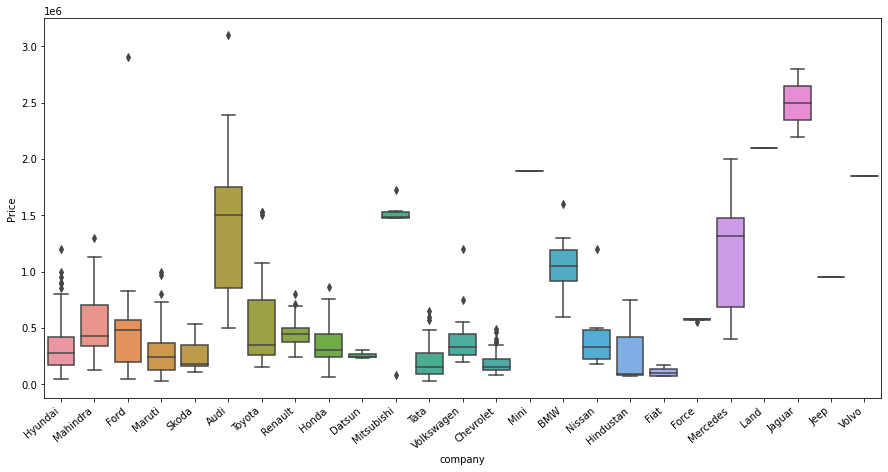

In [32]:
plt.subplots(figsize=(15,7))      #checking relationship of company column with price column using boxplot
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Checking relationship of Year with Price

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


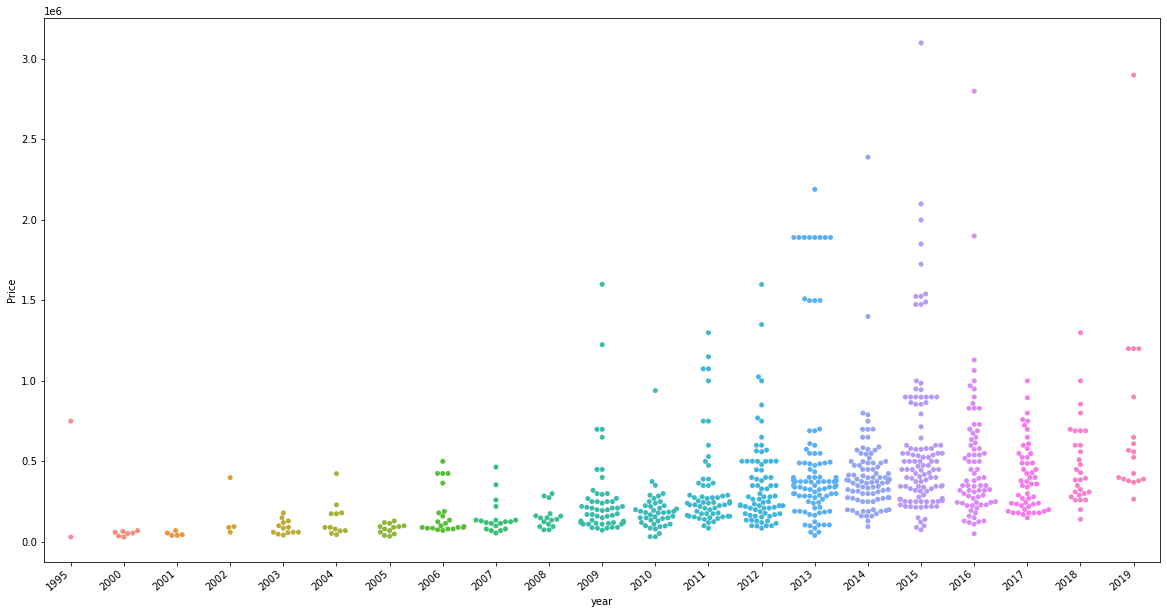

In [33]:
plt.subplots(figsize=(20,10))            #
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Checking relationship of kms_driven with Price

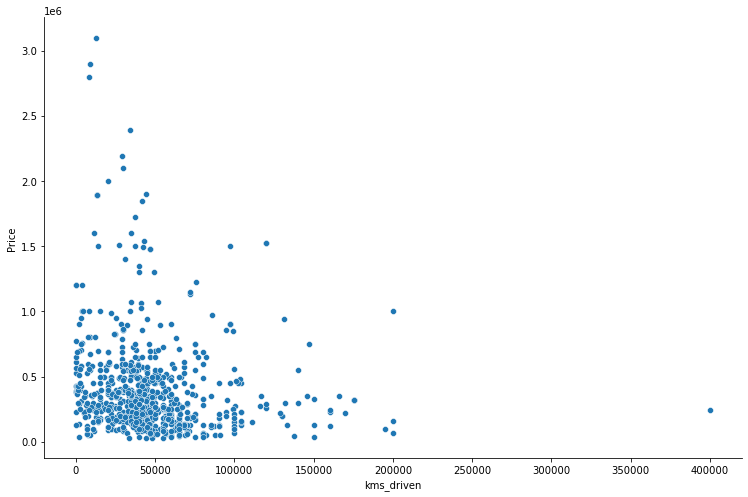

In [34]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)   #checking relation between price and kms_driven column

# Checking relationship of Fuel Type with Price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

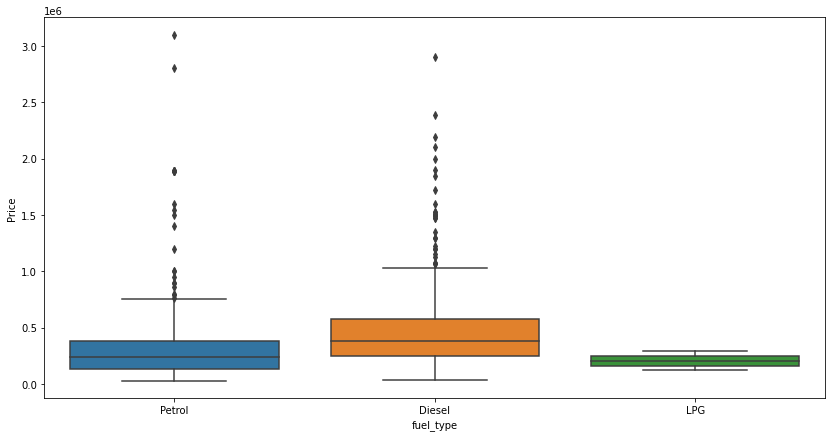

In [35]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

# Relationship of Price with FuelType, Year and Company mixed

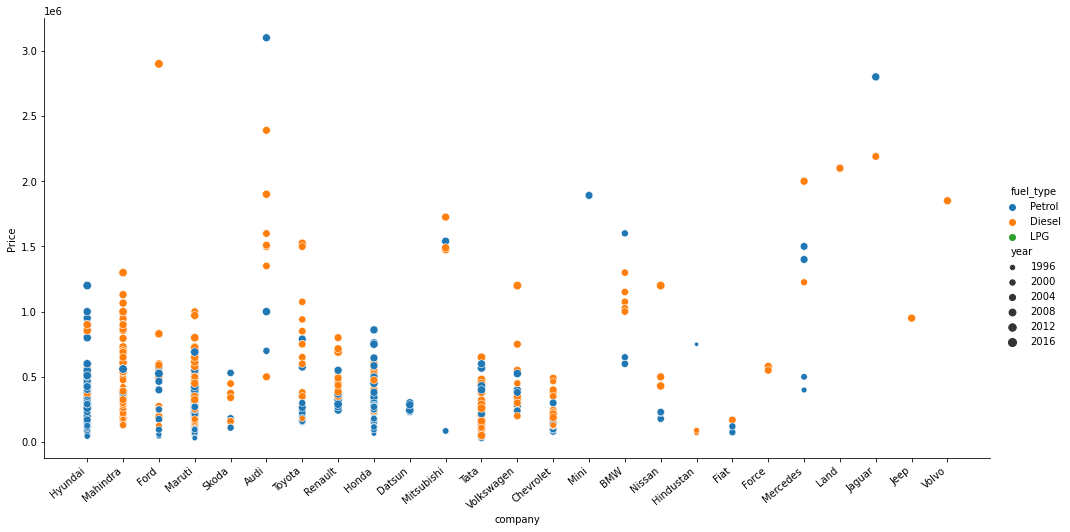

In [36]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

# Extracting Training Data

In [37]:
car.columns

Index([' name ', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [38]:
x = car[[' name ','company','year','kms_driven','fuel_type']]
y = car['Price']

In [39]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [40]:
y.shape

(815,)

# Applying Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression      #importing linear regression

In [43]:
from sklearn.preprocessing import OneHotEncoder    #importing OneHotEncoder to coverting the categorical values into numeric

In [44]:
from sklearn.compose import make_column_transformer     #importing column transformer

In [45]:
from sklearn.pipeline import make_pipeline    #creating piprline

In [46]:
from sklearn.metrics import r2_score  #r2_score to checking the performance

# OneHotEncoder object to contain all the possible categories

In [47]:
enc=OneHotEncoder()
enc.fit(x[[' name ','company','fuel_type']])  #fitting categorical column for converting into numeric

OneHotEncoder()

In [48]:
column_trans=make_column_transformer((OneHotEncoder(categories=enc.categories_),[' name ','company','fuel_type']),
                                    remainder='passthrough')   #converting them into the numeric column

# Linear Regression Model

In [49]:
lr = LinearRegression()   #Cerating object of linearregression model

# Making Pipeline


In [50]:
pipe=make_pipeline(column_trans,lr)

In [51]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [52]:
y_pred=pipe.predict(x_test)   #prediction of the x_test

# checking r2 score

In [53]:
r2_score(y_test,y_pred)    #chesking the performance of the model

0.7518722228183766

# Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [54]:
scores=[]          
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [55]:
np.argmax(scores)


655

In [56]:
scores[np.argmax(scores)]

0.9200894544056878

# Entering data to predict the price of the car

In [57]:
pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([400749.95482462])

# The best model is found at a certain random state

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.9200894544056878

In [59]:
import pickle as pkl

In [61]:
pkl.dump(pipe,open('LinearRegressionModel.pkl','wb'))